In [1]:
# The Chi-Square Test is a statistical test used to determine whether there is a significant association between categorical variables
# or whether an observed distribution matches an expected distribution. It is based on the chi-square statistic, which compares 
# the observed frequencies to the expected frequencies in a contingency table or dataset.
# Types of Chi-Square Tests
# Chi-Square Test for Independence The Chi-Square Test for Independence determines whether two categorical variables are 
# independent of each other. It uses a contingency table, where rows represent one variable and columns represent another.
# Hypotheses: •	H0: The two variables are independent. •	H1: The two variables are not independent.
# B UC: A retailer wants to check if the type of product purchased is independent of the day of the week. 
# For example, does the likelihood of buying electronics vary across weekdays and weekends?

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table: rows = Product Type, columns = Days
data = np.array([[50, 30, 20],  # Electronics
                 [40, 35, 25],  # Groceries
                 [15, 20, 30]]) # Clothing

# Create a DataFrame for clarity
df = pd.DataFrame(data, columns=['Weekday', 'Saturday', 'Sunday'], 
                  index=['Electronics', 'Groceries', 'Clothing'])

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: The variables are not independent.")
else:
    print("Fail to reject the null hypothesis: The variables are independent.")

Chi-Square Statistic: 17.787718164188753
p-value: 0.0013577249482435362
Degrees of Freedom: 4
Expected Frequencies:
 [[39.62264151 32.0754717  28.30188679]
 [39.62264151 32.0754717  28.30188679]
 [25.75471698 20.8490566  18.39622642]]
Reject the null hypothesis: The variables are not independent.


In [2]:
# Chi-Square Goodness-of-Fit Test The Chi-Square Goodness-of-Fit Test checks whether the observed distribution of a single categorical variable matches a theoretical or expected distribution.
# Hypotheses: The observed distribution matches the expected distribution. H1: The observed distribution does not match the expected distribution.
# B UC: A company wants to test if the number of customer complaints follows a uniform distribution across weekdays.

import numpy as np
from scipy.stats import chisquare

# Observed frequencies (complaints across weekdays)
observed = np.array([18, 22, 20, 25, 15])  # Mon, Tue, Wed, Thu, Fri

# Expected frequencies (assuming uniform distribution)
expected = np.full_like(observed, observed.sum() / len(observed))

# Perform Chi-Square Goodness-of-Fit Test
chi2, p = chisquare(f_obs=observed, f_exp=expected)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: The observed distribution does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed distribution matches the expected distribution.")

Chi-Square Statistic: 2.9
p-value: 0.5746972058298043
Fail to reject the null hypothesis: The observed distribution matches the expected distribution.


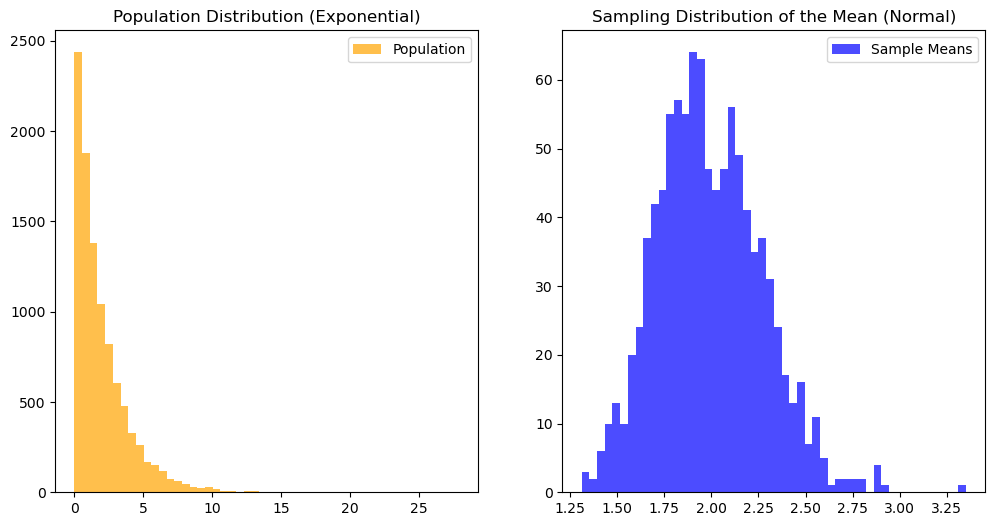

In [3]:
# The Central Limit Theorem (CLT) is a fundamental concept in statistics that states:
# •	When you take sufficiently large random samples from a population with any distribution, 
# the sampling distribution of the sample mean will tend to follow a normal distribution, regardless of the original population's distribution.
# The CLT applies under two main conditions: 1.	The sample size (nnn) is sufficiently large (commonly n≥30).
# 2.	The samples are independent and identically distributed (i).
# Key Components of the CLT - Population: The entire dataset or distribution from which samples are drawn. 
# Sample: A subset of data taken from the population. Sampling Distribution: The probability distribution of a statistic 
# (e.g., the mean) based on repeated sampling.
# Types of Central Limit Theorem Applications
# Sample Mean Distribution The CLT ensures that the distribution of sample means approaches a normal distribution 
# as the sample size increases, even if the original population is not normally distributed.
# B UC: A quality control team at a factory measures the weights of 1,000 products. The product weights may not follow a normal distribution, 
# but by taking random samples of size n=50n = 50n=50, the sampling distribution of the mean weight will follow a normal distribution.

import numpy as np
import matplotlib.pyplot as plt

# Population: Exponential Distribution (not normal)
population = np.random.exponential(scale=2, size=10000)

# Sampling distribution of the mean
sample_means = []
sample_size = 50

for _ in range(1000):  # Repeated sampling
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Plot the population and sampling distribution
plt.figure(figsize=(12, 6))

# Plot original population distribution
plt.subplot(1, 2, 1)
plt.hist(population, bins=50, alpha=0.7, color="orange", label="Population")
plt.title("Population Distribution (Exponential)")
plt.legend()

# Plot sampling distribution of the mean
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=50, alpha=0.7, color="blue", label="Sample Means")
plt.title("Sampling Distribution of the Mean (Normal)")
plt.legend()

plt.show()

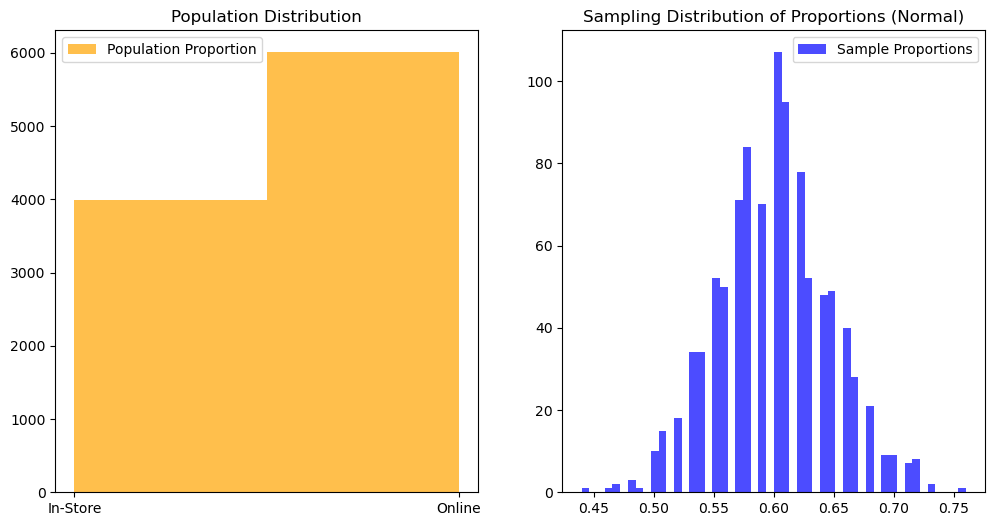

In [4]:
# Proportion Distribution The CLT also applies to proportions, ensuring that the sampling distribution of sample proportions 
# approaches a normal distribution as the sample size increases.
# B UC: An e-commerce company wants to estimate the proportion of customers who prefer online shopping to in-store shopping. 
# They survey random samples of size n=100n = 100n=100 and calculate the sample proportion. The distribution of these 
# sample proportions will follow a normal distribution.

import numpy as np
import matplotlib.pyplot as plt

# Population proportion
p = 0.6  # 60% of customers prefer online shopping
population_size = 10000
population = np.random.choice([0, 1], size=population_size, p=[1-p, p])  # 0: in-store, 1: online

# Sampling distribution of proportions
sample_proportions = []
sample_size = 100

for _ in range(1000):  # Repeated sampling
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_proportions.append(np.mean(sample))

# Plot the population and sampling distribution
plt.figure(figsize=(12, 6))

# Plot original population distribution
plt.subplot(1, 2, 1)
plt.hist(population, bins=2, alpha=0.7, color="orange", label="Population Proportion")
plt.title("Population Distribution")
plt.xticks([0, 1], labels=["In-Store", "Online"])
plt.legend()

# Plot sampling distribution of proportions
plt.subplot(1, 2, 2)
plt.hist(sample_proportions, bins=50, alpha=0.7, color="blue", label="Sample Proportions")
plt.title("Sampling Distribution of Proportions (Normal)")
plt.legend()

plt.show()

In [5]:
# R-Squared (R²) is a statistical measure that explains the proportion of the variance in the dependent variable that is 
# predictable from the independent variable(s) in a regression model. It is a key metric to evaluate the performance of a regression model.
# Types of R-Squared
# Simple R-Squared - Measures how well the model explains the variance in the dependent variable using the independent variables.
# B UC: A retail business uses R² to evaluate how well the number of advertisements predicts sales revenue.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Number of advertisements
y = np.array([3, 4, 2, 5, 6])  # Sales revenue

# Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# R-Squared
r2 = r2_score(y, y_pred)
print("Simple R-Squared:", r2)

Simple R-Squared: 0.49


In [6]:
# Adjusted R-Squared - adjusts the R² value for the number of predictors in the model. It penalizes adding irrelevant predictors.
# B UC: A car company uses adjusted R² to evaluate the impact of multiple factors (e.g., engine size, mileage, and age) 
# on car price while avoiding overfitting.

# Adjusted R-Squared
n = len(y)  # Number of observations
p = 1       # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-Squared:", adjusted_r2)

Adjusted R-Squared: 0.31999999999999995


In [7]:
# Negative R-Squared Occurs when the model performs worse than using the mean as the predictor.
# B UC: A failed attempt to use unrelated variables (e.g., weather data) to predict online shopping behavior might result in a negative R².

# Poorly fitting model
y_bad_pred = np.array([2, 2, 2, 2, 2])  # Constant predictions
negative_r2 = r2_score(y, y_bad_pred)
print("Negative R-Squared:", negative_r2)

Negative R-Squared: -2.0


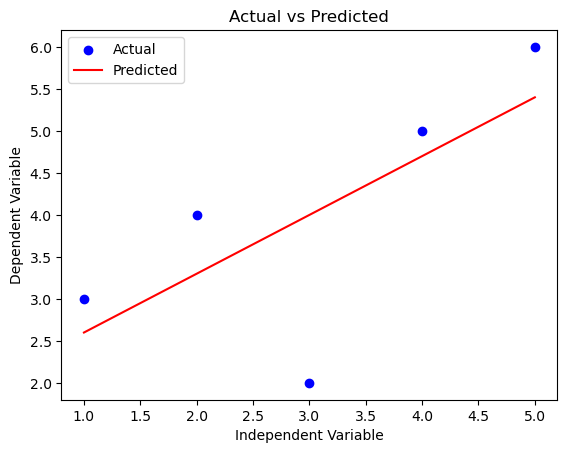

In [8]:
# Visualizing R-Squared - Plotting Actual vs Predicted Values

import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, y_pred, color="red", label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.legend()
plt.show()

In [15]:
# The Chi-Squared Distribution is a probability distribution that arises in the study of variance, particularly in hypothesis testing 
# and confidence intervals for categorical data. It is widely used in statistical tests like the Chi-Square Test for Independence and Goodness-of-Fit.
# Key Properties of Chi-Squared Distribution - 1.	It is non-negative (X2≥0). 2.	The shape of the distribution depends on the degrees of freedom k.
# 3.	For small kkk, the distribution is skewed to the right; as kkk increases, it becomes more symmetric.
# Applications of Chi-Squared Distribution - 1.	Goodness-of-Fit Test: Determines how well observed data matches an expected distribution.
# 2.	Test for Independence: Checks if two categorical variables are independent. 3.	Confidence Intervals: Used for estimating 
# the variance of a normal population.
# Types of Chi-Squared Applications
# Chi-Square Goodness-of-Fit Test - This test checks if the observed frequencies of a categorical variable match expected frequencies.
# B UC: A supermarket wants to check if customer visits are evenly distributed across the week.

import numpy as np
from scipy.stats import chisquare

# Observed frequencies
observed = np.array([50, 55, 45, 60, 40, 50, 50])  # Customer visits per day

# Expected frequencies (assuming equal distribution)
expected = np.full_like(observed, observed.sum() / len(observed))

# Chi-Square Goodness-of-Fit Test
chi2, p = chisquare(f_obs=observed, f_exp=expected)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: The observed distribution does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed distribution matches the expected distribution.")

Chi-Square Statistic: 5.0
p-value: 0.5438131158833297
Fail to reject the null hypothesis: The observed distribution matches the expected distribution.


In [14]:
# Chi-Square Test for Independence - This test determines whether two categorical variables are independent.
# B UC: A retailer wants to determine if product type (e.g., electronics, groceries, clothing) is associated with the day of 
# purchase (weekday or weekend).

from scipy.stats import chi2_contingency
import numpy as np

# Contingency Table: Rows = Product Type, Columns = Day
data = np.array([[30, 40],  # Electronics
                 [50, 30],  # Groceries
                 [20, 10]]) # Clothing

# Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: The variables are not independent.")
else:
    print("Fail to reject the null hypothesis: The variables are independent.")

Chi-Square Statistic: 7.633928571428571
p-value: 0.02199446857350544
Degrees of Freedom: 2
Expected Frequencies:
 [[38.88888889 31.11111111]
 [44.44444444 35.55555556]
 [16.66666667 13.33333333]]
Reject the null hypothesis: The variables are not independent.


In [13]:
# Chi-Square in Confidence Intervals The Chi-Squared distribution is used to calculate confidence intervals 
# for the variance (σ2) of a normal population.
# B UC: A factory wants to estimate the variability in the weights of products with 95% confidence.

import numpy as np
from scipy.stats import chi2

# Sample data
data = np.array([50.1, 49.9, 50.3, 50.2, 49.8])  # Weights of products
n = len(data)
sample_variance = np.var(data, ddof=1)

# Degrees of freedom
dof = n - 1

# Critical Chi-Square values
alpha = 0.05
chi2_lower = chi2.ppf(alpha / 2, dof)
chi2_upper = chi2.ppf(1 - alpha / 2, dof)

# Confidence Interval for variance
lower_bound = (dof * sample_variance) / chi2_upper
upper_bound = (dof * sample_variance) / chi2_lower

print(f"95% Confidence Interval for Variance: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for Variance: (0.02, 0.36)


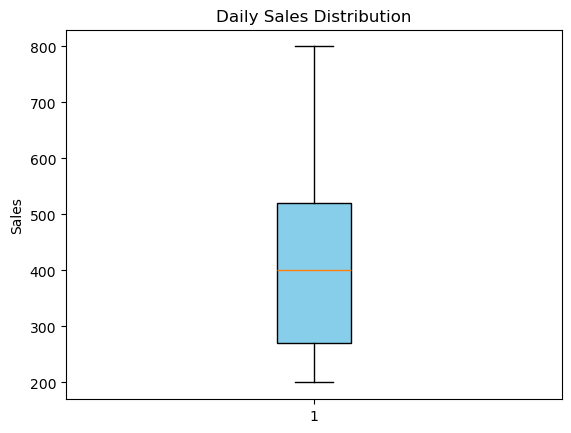

In [12]:
# A Box and Whisker Plot is a statistical graph that visually represents the distribution of a dataset through five summary statistics:
# 1. Minimum: The smallest data point excluding outliers. 2. First Quartile (Q1): The 25th percentile. 3. Median (Q2): The 50th percentile.
# 4. Third Quartile (Q3): The 75th percentile. 5. Maximum: The largest data point excluding outliers. 
# Components of a Boxplot: 1.	Box: o	Represents the interquartile range (IQR = Q3 - Q1). o	Contains 50% of the data.
# 2. Whiskers: o	Extend from the box to the smallest and largest values within 1.5 times the IQR from Q1 and Q3.
# 3. Outliers: o	Data points beyond the whiskers, marked as dots or stars.
# 4. Median Line: o	A horizontal line inside the box that shows the median (Q2).
# Types of Boxplots
# Standard Boxplot - A simple boxplot showing the distribution of a single dataset.
# B UC: A retail manager uses a boxplot to analyze daily sales and identify outliers (e.g., unusually high or low sales days).

import matplotlib.pyplot as plt

# Dataset
sales = [200, 220, 250, 270, 300, 320, 400, 450, 500, 520, 600, 700, 800]

# Create a Boxplot
plt.boxplot(sales, vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Daily Sales Distribution")
plt.ylabel("Sales")
plt.show()

C:\Users\mahav\AppData\Local\Temp\ipykernel_7436\3758767772.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([it_salaries, hr_salaries, finance_salaries],


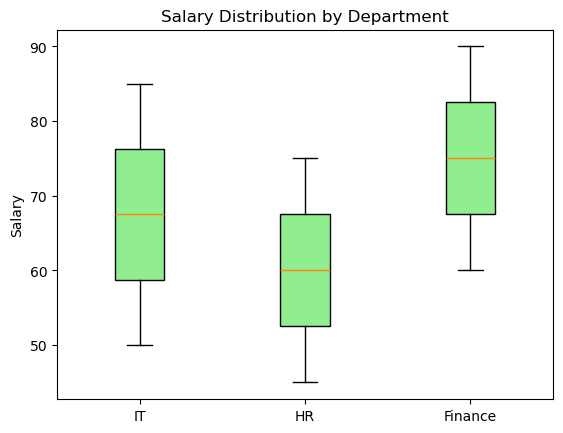

In [11]:
# Grouped Boxplot Compares the distribution of multiple datasets side by side.
# B UC: An HR manager compares monthly salaries across three departments (IT, HR, and Finance) to analyze variations and potential outliers.

# Datasets
it_salaries = [50, 55, 60, 65, 70, 75, 80, 85]
hr_salaries = [45, 50, 55, 60, 65, 70, 75]
finance_salaries = [60, 65, 70, 75, 80, 85, 90]

# Create a Grouped Boxplot
plt.boxplot([it_salaries, hr_salaries, finance_salaries], 
            patch_artist=True,
            labels=["IT", "HR", "Finance"],
            boxprops=dict(facecolor="lightgreen"))
plt.title("Salary Distribution by Department")
plt.ylabel("Salary")
plt.show()

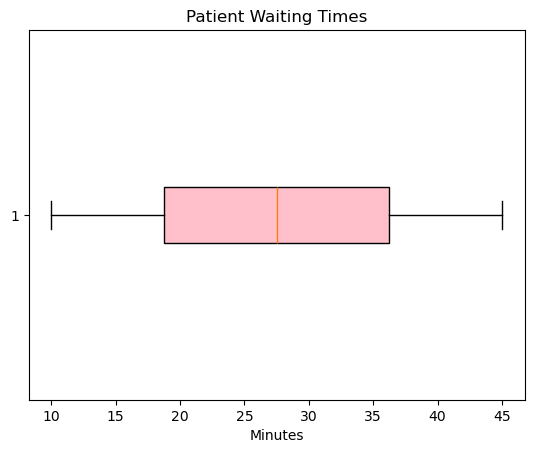

In [10]:
# 3. Horizontal Boxplot - A boxplot rotated horizontally for better readability when dealing with long category labels or to emphasize the data range.
# B UC: A healthcare provider visualizes patient waiting times for different clinics.

# Dataset
waiting_times = [10, 15, 20, 25, 30, 35, 40, 45]

# Create a Horizontal Boxplot
plt.boxplot(waiting_times, vert=False, patch_artist=True, boxprops=dict(facecolor="pink"))
plt.title("Patient Waiting Times")
plt.xlabel("Minutes")
plt.show()

C:\Users\mahav\AppData\Local\Temp\ipykernel_7436\2400619339.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([machine_a, machine_b],


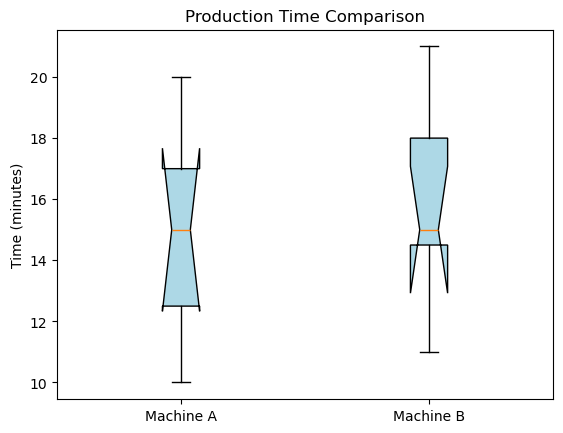

In [9]:
# 4. Notched Boxplot - A boxplot with a notch around the median to indicate confidence intervals, useful for comparing medians between groups.
# B UC: A manufacturing company compares production times across different machines to identify significant differences.

# Datasets
machine_a = [10, 12, 13, 15, 16, 18, 20]
machine_b = [11, 14, 15, 15, 17, 19, 21]

# Create a Notched Boxplot
plt.boxplot([machine_a, machine_b], 
            notch=True,
            patch_artist=True,
            labels=["Machine A", "Machine B"],
            boxprops=dict(facecolor="lightblue"))
plt.title("Production Time Comparison")
plt.ylabel("Time (minutes)")
plt.show()